ANÁLISE EXPLORATÓRIA DE DADOS - AÇÃO DE DISTRIBUIÇÃO DE ALIMENTOS (ADA)

1. CARREGAMENTO DO DATASET

Dataset carregado com sucesso.
Formato do dataset: 186 linhas x 12 colunas

2. TRATAMENTO INICIAL DOS DADOS

Colunas de quantidade identificadas: ['qtd_cestas_alim_entr_fam_indigenas', 'qtd_cestas_alim_entr_fam_quilombolas', 'qtd_cestas_alim_entr_fam_extrativistas', 'qtd_cestas_alim_entr_fam_pescadores', 'qtd_cestas_alim_entr_fam_atend_emergencial', 'qtd_cestas_alim_entr_fam_assentados', 'qtd_cestas_alim_entr_fam_catadores', 'qtd_cestas_alim_entr_fam_ciganas', 'qtd_cestas_alim_entr_fam_rural', 'qtd_total_cestas_alim_entr', 'uf_nome']
Valores nulos substituídos por 0.

3. PRIMEIRA VISUALIZAÇÃO DOS DADOS

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   codigo_i

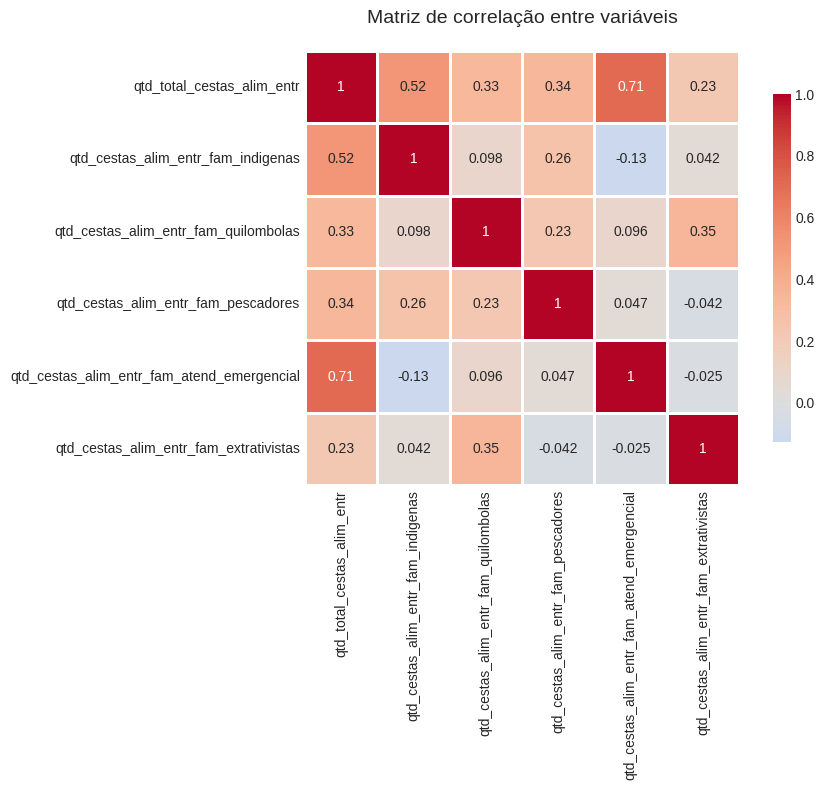


8. HISTOGRAMAS - DISTRIBUIÇÃO DAS VARIÁVEIS


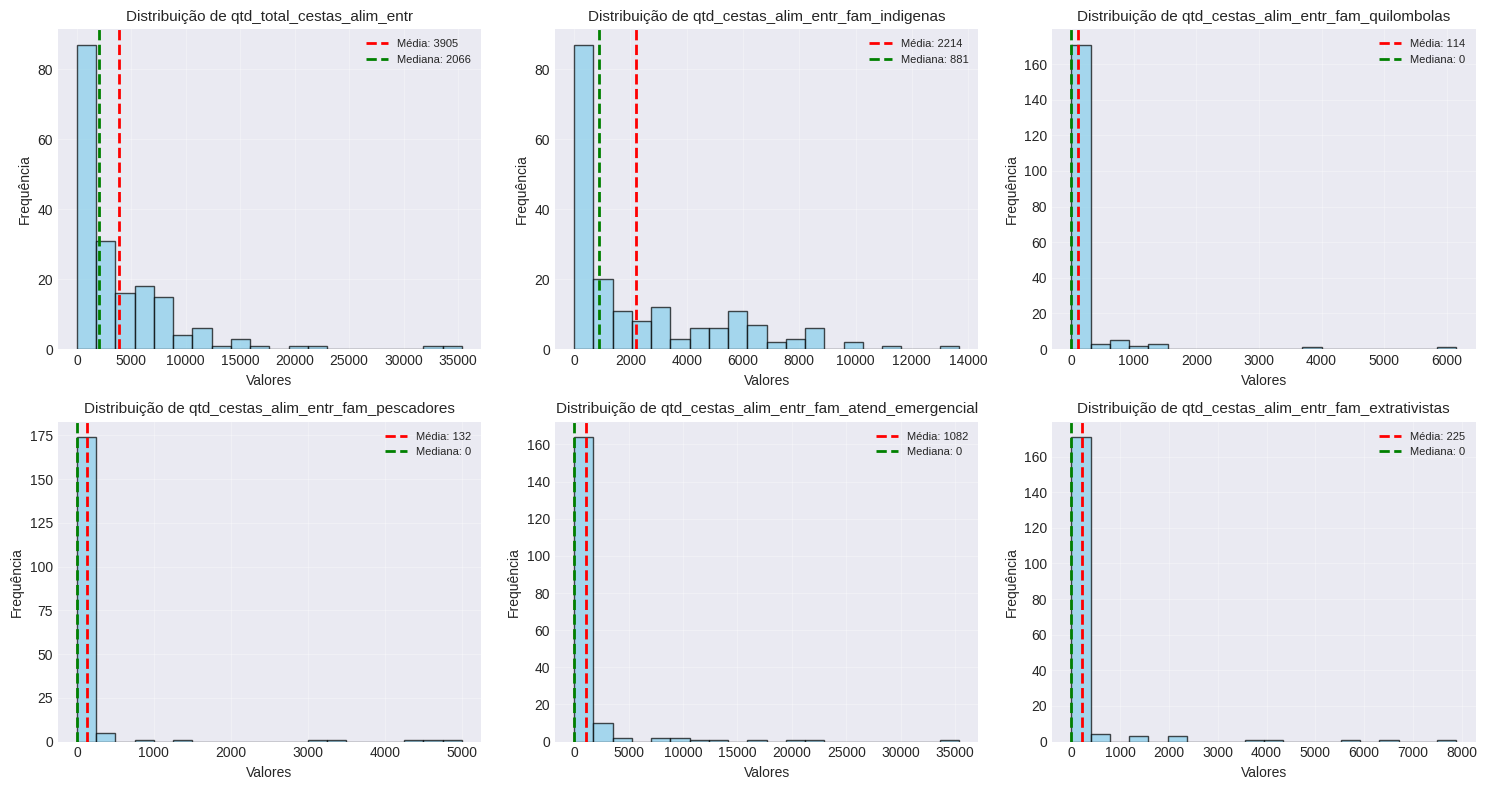


9. BOXPLOTS - IDENTIFICAÇÃO DE OUTLIERS


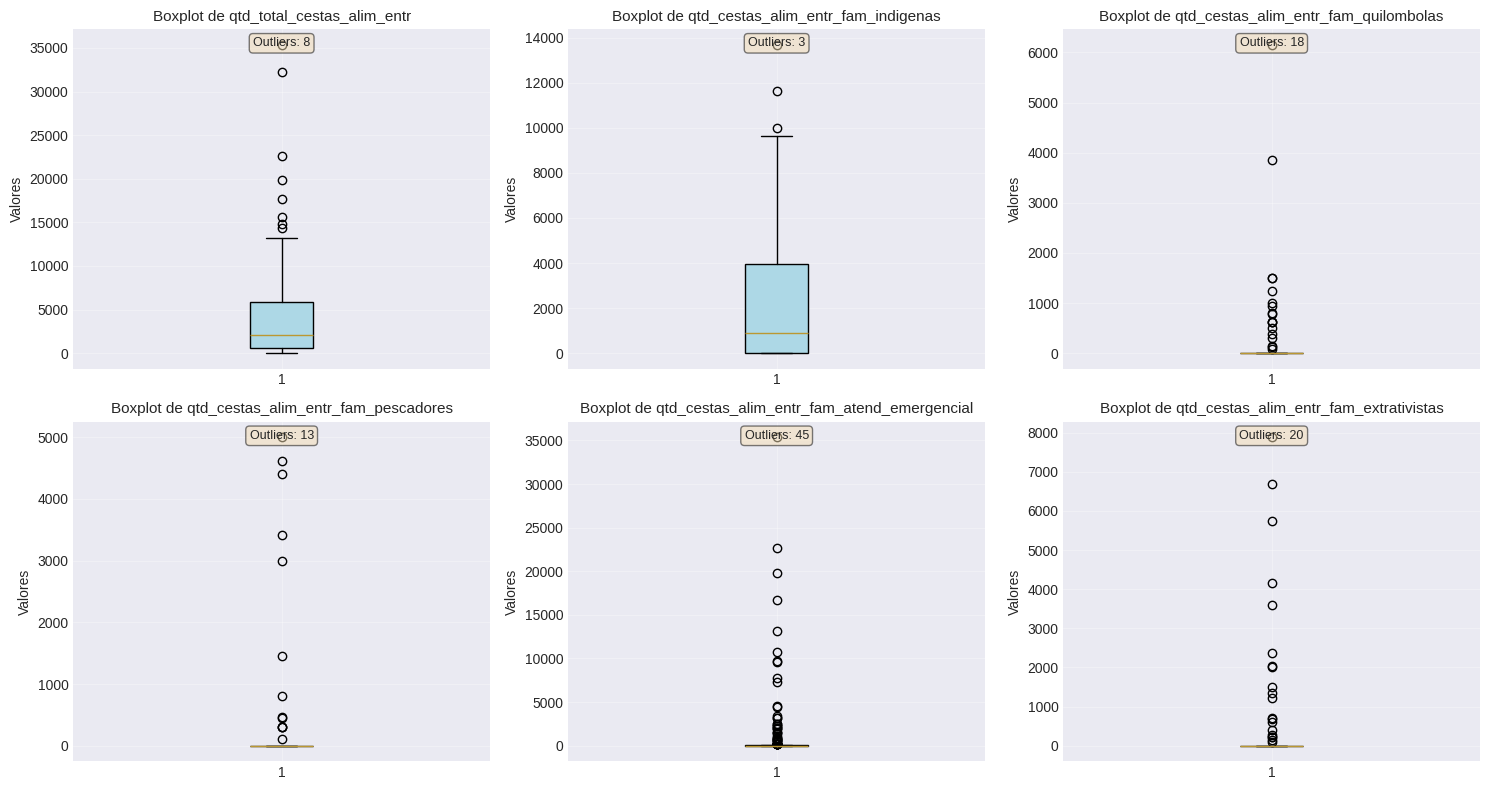


Análise de outliers:

qtd_total_cestas_alim_entr:
  - Limite inferior: -7169.00
  - Limite superior: 13615.00
  - Número de outliers: 8
  - Percentual de outliers: 4.30%

qtd_cestas_alim_entr_fam_indigenas:
  - Limite inferior: -5941.12
  - Limite superior: 9901.88
  - Número de outliers: 3
  - Percentual de outliers: 1.61%

qtd_cestas_alim_entr_fam_quilombolas:
  - Limite inferior: 0.00
  - Limite superior: 0.00
  - Número de outliers: 18
  - Percentual de outliers: 9.68%

qtd_cestas_alim_entr_fam_pescadores:
  - Limite inferior: 0.00
  - Limite superior: 0.00
  - Número de outliers: 13
  - Percentual de outliers: 6.99%

qtd_cestas_alim_entr_fam_atend_emergencial:
  - Limite inferior: -72.00
  - Limite superior: 120.00
  - Número de outliers: 45
  - Percentual de outliers: 24.19%

qtd_cestas_alim_entr_fam_extrativistas:
  - Limite inferior: 0.00
  - Limite superior: 0.00
  - Número de outliers: 20
  - Percentual de outliers: 10.75%

10. GRÁFICOS DE DISPERSÃO - RELAÇÃO ENTRE VARIÁVEIS

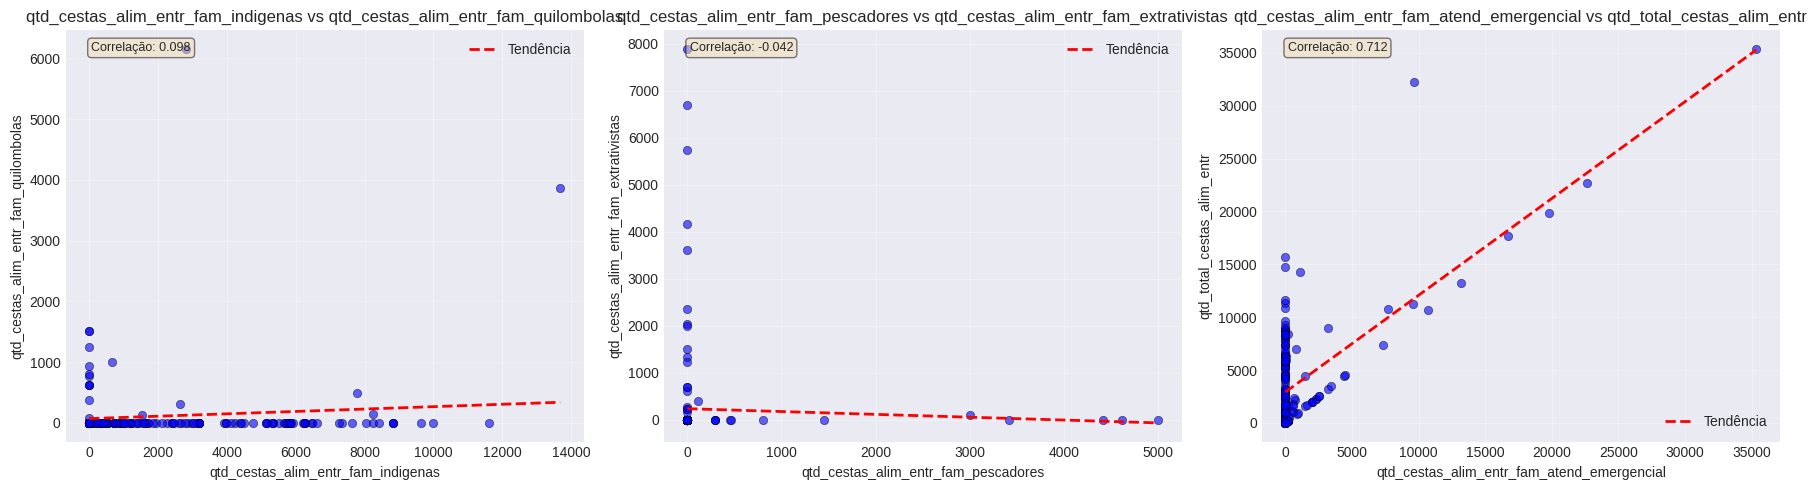


11. ANÁLISE TEMPORAL - EVOLUÇÃO MENSAL


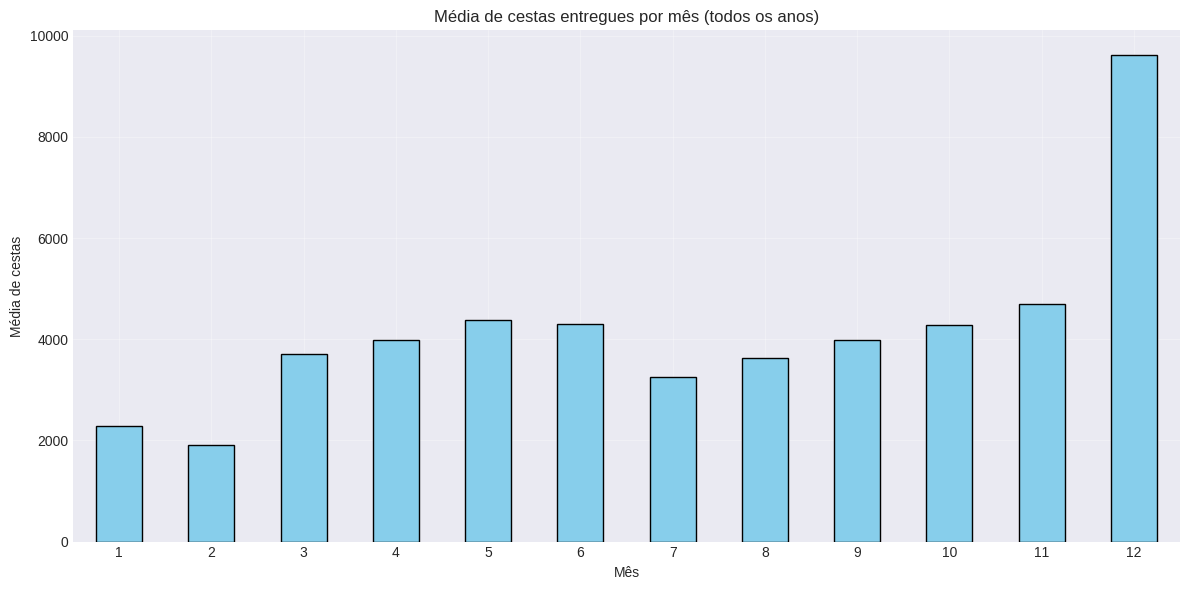


Média de cestas por mês:
mes
1     2280.592593
2     1904.481481
3     3705.625000
4     3975.466667
5     4372.538462
6     4304.750000
7     3262.733333
8     3634.100000
9     3983.545455
10    4276.250000
11    4696.461538
12    9623.533333
Name: qtd_total_cestas_alim_entr, dtype: float64

12. ANÁLISE POR MUNICÍPIO - TOP 10


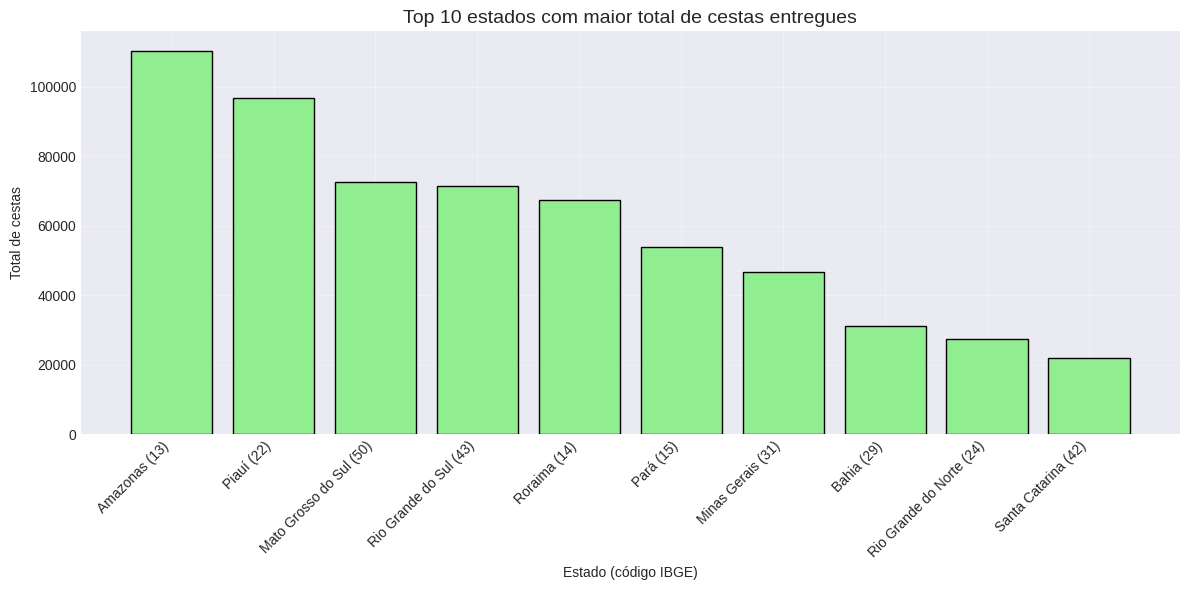


Top 10 estados com maior total de cestas:
  • Amazonas (13): 110407.0
  • Piauí (22): 96771.0
  • Mato Grosso do Sul (50): 72433.0
  • Rio Grande do Sul (43): 71285.0
  • Roraima (14): 67410.0
  • Pará (15): 53946.0
  • Minas Gerais (31): 46550.0
  • Bahia (29): 31212.0
  • Rio Grande do Norte (24): 27496.0
  • Santa Catarina (42): 21915.0

13. RESUMO DOS PRINCIPAIS INSIGHTS

Principais observações:
  • A variável 'qtd_total_cestas_alim_entr' apresenta assimetria significativa (média=3905, mediana=2066)
  • A variável 'qtd_cestas_alim_entr_fam_indigenas' apresenta assimetria significativa (média=2214, mediana=881)
  • A variável 'qtd_cestas_alim_entr_fam_quilombolas' apresenta assimetria significativa (média=114, mediana=0)
  • 18 outliers identificados em 'qtd_cestas_alim_entr_fam_quilombolas' (9.7% dos dados)
  • 13 outliers identificados em 'qtd_cestas_alim_entr_fam_pescadores' (7.0% dos dados)
  • 45 outliers identificados em 'qtd_cestas_alim_entr_fam_atend_emergencial' (24.2% dos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

# Informações sobre o dataset

# Nome original do Dataset: 2025 - Ação de Distribuição de Alimentos (ADA) - Quantidade de cestas de alimentos entregues
# Link original: https://dados.gov.br/dados/conjuntos-dados/acao-de-distribuicao-de-alimentos
# Órgão responsável: Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome (MDS)
# Número de registros: 12 colunas e 187 linhas (entradas)
# Descrição do tema: A ação atua de forma integrada no âmbito do Sistema Federal de Proteção e Defesa Civil e tem como objetivo garantir o direito constitucional de acesso à alimentação, de forma imediata e urgente aos municípios afetados pelos desastres e às Cozinhas Solidárias que atuam fornecendo refeições à voluntários e/ou famílias afetadas por emergências.
# Significado de algumas variáveis importantes:
# qtd_cestas_alim_entr_fam_quilombolas: quantidade de cestas de alimentos entregues às famílias quilombolas
# kg_alim_entr_fam_pescadores: quilos de alimentos entregues às famílias de pescadores
# qtd_cestas_alim_entr_fam_atend_emergencial: quantidade de cestas de alimentos entregues às famílias em atendimentos emergenciais
# kg_alim_entr_fam_indigenas: quilos de alimentos entregues às famílias indígenas
# qtd_cestas_alim_entr_fam_assentados: quantidade de cestas de alimentos entregues às famílias assentadas/acampadas
# kg_total_alim_entregues: quilos de alimentos entregues a todos os segmentos
# qtd_total_cestas_alim_entr: quantidade de cestas de alimentos entregues a todos os segmentos

# Fim da seção

# configurando os codigos de estado
mapa_ufs = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco',
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia',
    31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro', 35: 'São Paulo',
    41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul', 51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

# configurando o estilo dos graficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("ANÁLISE EXPLORATÓRIA DE DADOS - AÇÃO DE DISTRIBUIÇÃO DE ALIMENTOS (ADA)")
print("="*80)

# 1. CARREGAMENTO DO DATASET

print("\n" + "="*80)
print("1. CARREGAMENTO DO DATASET")
print("="*80)

try:
    df = pd.read_csv(
        'cestas-de-alimentos-entregues-2025.csv',
        encoding='utf-8',
        sep=',',
        skipinitialspace=True,
        na_values=['', ' ']
    )

    print("\nDataset carregado com sucesso.")
    print(f"Formato do dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")

except FileNotFoundError:
    print("\nArquivo não encontrado. Verifique o caminho do arquivo.")
    uploaded = files.upload()
    df = pd.read_csv(next(iter(uploaded)), encoding='utf-8', sep=',', skipinitialspace=True, na_values=['', ' '])

df['uf_nome'] = df['codigo_ibge'].map(mapa_ufs)

# 2. TRATAMENTO INICIAL DOS DADOS

print("\n" + "="*80)
print("2. TRATAMENTO INICIAL DOS DADOS")
print("="*80)

colunas_quantidade = [col for col in df.columns if col not in ['codigo_ibge', 'anomes_s']]
print(f"\nColunas de quantidade identificadas: {colunas_quantidade}")

df[colunas_quantidade] = df[colunas_quantidade].fillna(0)
print("Valores nulos substituídos por 0.")

# 3. PRIMEIRA VISUALIZAÇÃO DOS DADOS

print("\n" + "="*80)
print("3. PRIMEIRA VISUALIZAÇÃO DOS DADOS")
print("="*80)

print("\nInformações do dataset:")
print(df.info())

# 4. ESTATÍSTICAS DESCRITIVAS DETALHADAS

print("\n" + "="*80)
print("4. ESTATÍSTICAS DESCRITIVAS")
print("="*80)

variaveis_principais = [
    'qtd_total_cestas_alim_entr',
    'qtd_cestas_alim_entr_fam_indigenas',
    'qtd_cestas_alim_entr_fam_quilombolas',
    'qtd_cestas_alim_entr_fam_pescadores',
    'qtd_cestas_alim_entr_fam_atend_emergencial',
    'qtd_cestas_alim_entr_fam_extrativistas'
]

variaveis_principais = [v for v in variaveis_principais if v in df.columns]

estatisticas = []

for coluna in variaveis_principais:
    media = df[coluna].mean()
    mediana = df[coluna].median()

    moda_series = df[coluna].mode()
    moda = moda_series.iloc[0] if not moda_series.empty else np.nan

    minimo = df[coluna].min()
    maximo = df[coluna].max()
    desvio_padrao = df[coluna].std()
    variancia = df[coluna].var()
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    iqr = q3 - q1

    estatisticas.append({
        'variavel': coluna,
        'media': round(media, 2),
        'mediana': round(mediana, 2),
        'moda': round(moda, 2),
        'minimo': round(minimo, 2),
        'maximo': round(maximo, 2),
        'desvio padrao': round(desvio_padrao, 2),
        'variancia': round(variancia, 2),
        'q1 (25%)': round(q1, 2),
        'q3 (75%)': round(q3, 2),
        'iqr': round(iqr, 2)
    })

df_estatisticas = pd.DataFrame(estatisticas)
print("\nEstatísticas descritivas completas:")
print(df_estatisticas)

df_estatisticas.to_csv('estatisticas_descritivas.csv', index=False)
print("\nEstatísticas salvas em 'estatisticas_descritivas.csv'.")

# 7. ANÁLISE DE CORRELAÇÃO

print("\n" + "="*80)
print("7. ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS")
print("="*80)

correlacao = df[variaveis_principais].corr()

print("\nMatriz de correlação:")
print(correlacao)

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de correlação entre variáveis', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# 7. VISUALIZACOES - HISTOGRAMAS

print("\n" + "="*80)
print("8. HISTOGRAMAS - DISTRIBUIÇÃO DAS VARIÁVEIS")
print("="*80)

n_vars = len(variaveis_principais)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, var in enumerate(variaveis_principais):
    axes[i].hist(df[var], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    axes[i].axvline(df[var].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Média: {df[var].mean():.0f}')
    axes[i].axvline(df[var].median(), color='green', linestyle='--', linewidth=2,
                   label=f'Mediana: {df[var].median():.0f}')
    axes[i].set_title(f'Distribuição de {var}', fontsize=11)
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('Frequência')
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 8. VISUALIZACOES - BOXPLOTS

print("\n" + "="*80)
print("9. BOXPLOTS - IDENTIFICAÇÃO DE OUTLIERS")
print("="*80)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, var in enumerate(variaveis_principais):
    bp = axes[i].boxplot(df[var], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    axes[i].set_title(f'Boxplot de {var}', fontsize=11)
    axes[i].set_ylabel('Valores')
    axes[i].grid(True, alpha=0.3)

    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    outliers = df[var][(df[var] < q1 - 1.5*iqr) | (df[var] > q3 + 1.5*iqr)]

    axes[i].text(0.5, 0.95, f'Outliers: {len(outliers)}',
                transform=axes[i].transAxes, ha='center', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("\nAnálise de outliers:")
for var in variaveis_principais:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5*iqr
    limite_superior = q3 + 1.5*iqr
    outliers = df[var][(df[var] < limite_inferior) | (df[var] > limite_superior)]

    if len(outliers) > 0:
        print(f"\n{var}:")
        print(f"  - Limite inferior: {limite_inferior:.2f}")
        print(f"  - Limite superior: {limite_superior:.2f}")
        print(f"  - Número de outliers: {len(outliers)}")
        print(f"  - Percentual de outliers: {(len(outliers)/len(df)*100):.2f}%")

# 9. DISPERSÃO

print("\n" + "="*80)
print("10. GRÁFICOS DE DISPERSÃO - RELAÇÃO ENTRE VARIÁVEIS")
print("="*80)

pares_dispersao = [
    ('qtd_cestas_alim_entr_fam_indigenas', 'qtd_cestas_alim_entr_fam_quilombolas'),
    ('qtd_cestas_alim_entr_fam_pescadores', 'qtd_cestas_alim_entr_fam_extrativistas'),
    ('qtd_cestas_alim_entr_fam_atend_emergencial', 'qtd_total_cestas_alim_entr')
]

pares_validos = [(x, y) for x, y in pares_dispersao if x in df.columns and y in df.columns]

n_pares = len(pares_validos)
if n_pares > 0:
    fig, axes = plt.subplots(1, n_pares, figsize=(6*n_pares, 5))
    if n_pares == 1:
        axes = [axes]

    for i, (x_var, y_var) in enumerate(pares_validos):
        axes[i].scatter(df[x_var], df[y_var], alpha=0.6, c='blue', edgecolors='black', linewidth=0.5)
        axes[i].set_xlabel(x_var)
        axes[i].set_ylabel(y_var)
        axes[i].set_title(f'{x_var} vs {y_var}')
        axes[i].grid(True, alpha=0.3)

        if df[x_var].nunique() > 1 and df[y_var].nunique() > 1:
            z = np.polyfit(df[x_var], df[y_var], 1)
            p = np.poly1d(z)
            x_sorted = df[x_var].sort_values()
            axes[i].plot(x_sorted, p(x_sorted), color='red', linestyle='--', linewidth=2, label='Tendência')
            axes[i].legend()

        correl = df[x_var].corr(df[y_var])
        axes[i].text(0.05, 0.95, f'Correlação: {correl:.3f}',
                    transform=axes[i].transAxes, fontsize=9,
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()
else:
    print("Nenhum par válido para gráfico de dispersão.")

# 10. ANALISE TEMPORAL

print("\n" + "="*80)
print("11. ANÁLISE TEMPORAL - EVOLUÇÃO MENSAL")
print("="*80)

df['ano'] = (df['anomes_s'] // 100).astype(int)
df['mes'] = (df['anomes_s'] % 100).astype(int)

media_por_mes = df.groupby('mes')['qtd_total_cestas_alim_entr'].mean()

plt.figure(figsize=(12, 6))
media_por_mes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Média de cestas entregues por mês (todos os anos)')
plt.xlabel('Mês')
plt.ylabel('Média de cestas')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nMédia de cestas por mês:")
print(media_por_mes)

# 11. MUNICÍPIOS

print("\n" + "="*80)
print("12. ANÁLISE POR MUNICÍPIO - TOP 10")
print("="*80)

total_por_estado = (
    df.groupby(['codigo_ibge', 'uf_nome'])['qtd_total_cestas_alim_entr']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))

labels = [
    f"{nome} ({codigo})" if pd.notna(nome) else str(codigo)
    for codigo, nome in total_por_estado.index
]

valores = total_por_estado.values

plt.bar(labels, valores, color='lightgreen', edgecolor='black')

plt.title('Top 10 estados com maior total de cestas entregues', fontsize=14)
plt.xlabel('Estado (código IBGE)')
plt.ylabel('Total de cestas')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTop 10 estados com maior total de cestas:")

for (codigo, nome), valor in total_por_estado.items():
    if pd.notna(nome):
        print(f"  • {nome} ({codigo}): {valor}")
    else:
        print(f"  • Código {codigo}: {valor}")

# 12. INSIGHTS

print("\n" + "="*80)
print("13. RESUMO DOS PRINCIPAIS INSIGHTS")
print("="*80)

print("\nPrincipais observações:")

for var in variaveis_principais[:3]:
    media = df[var].mean()
    mediana = df[var].median()
    if media > 0 and abs(media - mediana) / media > 0.2:
        print(f"  • A variável '{var}' apresenta assimetria significativa (média={media:.0f}, mediana={mediana:.0f})")

for var in variaveis_principais:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    outliers = df[var][(df[var] < q1 - 1.5*iqr) | (df[var] > q3 + 1.5*iqr)]
    if len(outliers) > 0:
        pct_outliers = (len(outliers)/len(df)*100)
        if pct_outliers > 5:
            print(f"  • {len(outliers)} outliers identificados em '{var}' ({pct_outliers:.1f}% dos dados)")

correlacao = df[variaveis_principais].corr()
for i in range(len(correlacao.columns)):
    for j in range(i+1, len(correlacao.columns)):
        if abs(correlacao.iloc[i, j]) > 0.8:
            print(f"  • Forte correlação ({correlacao.iloc[i, j]:.2f}) entre '{correlacao.columns[i]}' e '{correlacao.columns[j]}'")

maior_media = df_estatisticas.loc[df_estatisticas['media'].idxmax()]
print(f"  • A variável com maior média de entregas é '{maior_media['variavel']}' ({maior_media['media']:.0f} cestas)")

mes_maior = media_por_mes.idxmax()
mes_menor = media_por_mes.idxmin()
print(f"  • A média de entregas é maior no mês {mes_maior} e menor no mês {mes_menor}")
